In [94]:
LOG_FOLDER = '../../data/logs/'

In [95]:
import os
import numpy as np
from matplotlib import pyplot as plt, cm
from matplotlib.patches import Rectangle, Patch

In [96]:
folders = []
for folder in os.scandir(LOG_FOLDER):
    folders.append(folder)

In [97]:
#for file in os.scandir(folder):
#    path = file.path
#    if path.endswith('.npy'):
#        data = np.load(path)
#        plot_curve(data)

In [98]:
filename = 'heatmap_losses_test_epoch.npy'
d_dict = {}
for folder in folders:
    name = folder.path.split(os.sep)[-1]
    d_dict[name] = np.load(os.path.join(folder, filename))
d_dict
plot_curve(d_dict, begin=0, steps=10, xlabel='epoch', ylabel='heatmap loss [log]', log=True, out_name='heatmap_loss_test_epoch.png')

NotADirectoryError: [Errno 20] Not a directory: '../../data/logs/heatmap_loss_test_epoch.png/heatmap_losses_test_epoch.npy'

In [ ]:
filename = 'label_losses_test_epoch.npy'
d_dict = {}
for folder in folders:
    name = folder.path.split(os.sep)[-1]
    d_dict[name] = np.load(os.path.join(folder, filename))
d_dict
plot_curve(d_dict, steps=10, xlabel='epoch', ylabel='label loss  [log]',log=True, out_name='label_loss_test_epoch.png')

In [ ]:
filename = 'heatmap_losses_test_step.npy'
d_dict = {}
for folder in folders:
    name = folder.path.split(os.sep)[-1]
    d_dict[name] = np.load(os.path.join(folder, filename))
d_dict
plot_curve(d_dict, steps=46, xlabel='step', ylabel='heatmap loss', log=False, out_name='heatmap_loss_test_step.png')

In [ ]:
filename = 'label_losses_test_step.npy'
d_dict = {}
for folder in folders:
    name = folder.path.split(os.sep)[-1]
    d_dict[name] = np.load(os.path.join(folder, filename))
plot_curve(d_dict, xlabel='step', ylabel='label loss', steps=46, log=False, out_name='label_loss_test_step.png')

In [ ]:
filename = 'val_acc_test_epoch.npy'
d_dict = {}
for folder in folders:
    name = folder.path.split(os.sep)[-1]
    d_dict[name] = np.load(os.path.join(folder, filename))
plot_curve(d_dict, begin=1, steps=10, xlabel='epoch', ylabel='accuracy', log=False, out_name='val_acc_test_epoch.png')

In [ ]:
filename = 'val_acc_test_step.npy'
d_dict = {}
for folder in folders:
    name = folder.path.split(os.sep)[-1]
    d_dict[name] = np.load(os.path.join(folder, filename))
plot_curve(d_dict, begin=0, steps=46, xlabel='step', ylabel='accuracy', log=False, out_name='val_acc_test_step.png')

In [ ]:
filename = 'label_losses_train.npy'
stepwidth = 30
for folder in folders:
    name = folder.path.split(os.sep)[-1]
    d_dict[name] = np.load(os.path.join(folder, filename))

data = d_dict['resnet-18']
EPOCH_SIZE = 6223
train_epoch = data.reshape()

In [ ]:
def plot_curve(d_dict, begin=0, xlabel=None, ylabel=None, steps=None, log=False, out_name=None):
    color = cm.plasma(np.linspace(0, 1, len(d_dict)))
    i = 0
    for model_name, data in d_dict.items():
        if steps:
            plt.plot(data[begin:steps], color=color[i], label=model_name)
        else:
            plt.plot(data[begin:], color=color[i], label=model_name)
        i += 1
    plt.legend()
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    
    if log:
        plt.yscale('log')
    else:
        plt.yscale('linear')
    if out_name:
        plt.savefig(os.path.join(LOG_FOLDER, out_name), dpi=300)
    plt.show()

In [ ]:
import torch
from dataLoader import createDataset_300W_LP
from helperFunctions import getBoxFromHeatMap
from torch.nn.functional import softmax

In [126]:
EPOCH_NDX = 2
LOG_FOLDER = '../../data/logs/'
MODEL_NAME = 'resnet-18-train-all-heatmaps'
MODEL_PATH = os.path.join(LOG_FOLDER, MODEL_NAME, f'model_epoch{EPOCH_NDX}.pth')
TEST_PATH = '../../data/siim-covid19-detection/test'
TRAIN_PATH = '../../data/siim-covid19-detection/train'
#    CSV_FILE = 'evaluation.csv'
METADATA_IMAGE = '../../data/siim-covid19-detection/train_image_level.csv'
METADATA_STUDY = '../../data/siim-covid19-detection/train_study_level.csv'
BATCH_SIZE = 16
labels = ["negative", "typical", "indeterminate", "atypical"]
dev = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [127]:
model = torch.load(MODEL_PATH, map_location=dev)
model.to(dev)

AmerModel(
  (backbone): AmerBackbone(
    (core): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=

In [128]:
 _, test_dataloader, _ = createDataset_300W_LP(dataset_train_path=TRAIN_PATH, dataset_test_path=TEST_PATH,
                                                  metadata_image_path=METADATA_IMAGE, metadata_study_path=METADATA_STUDY,
                                                  test_batch=BATCH_SIZE, train_batch=BATCH_SIZE,
                                                  conf_data_loading_test={'num_workers': 1})

-> Load Data...


In [129]:
def plot_lung(image, heat_pred, box_truth, class_pred, class_truth):
    bs = len(image)
    image = image.permute(0, 2, 3, 1)
    for i in range(bs):
        ax = plt.gca()
        plt.imshow(image[i])
        plt.imshow(heat_pred[i], cmap='hot', alpha=0.2)
        for box in box_truth[i]:
            sx, sy, ex, ey = box
            w, h = ex - sx, ey -sy
            bb = Rectangle((sx,sy), w, h, fill=None, color='red', linewidth=3)
            ax.add_patch(bb)
        bb = Patch(color='red', label=labels[class_truth[i]])
        a = Patch(color='blue', label=labels[class_pred[i]])
        plt.legend(handles=[bb, a])
        plt.xticks([])
        plt.yticks([])
        plt.savefig(os.path.join(LOG_FOLDER, MODEL_NAME, 'lung_plots', f'lung_plot{i}_{MODEL_NAME}_epoch{EPOCH_NDX}.png'), dpi=300, bbox_inches='tight')
        plt.show()

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])


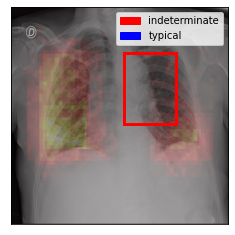

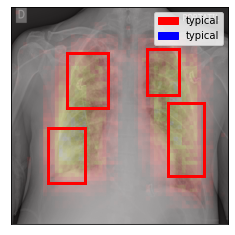

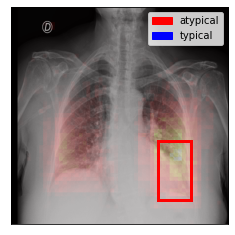

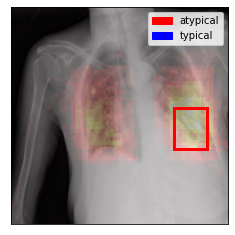

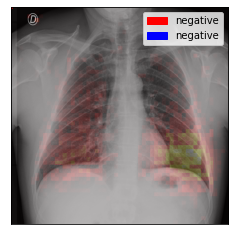

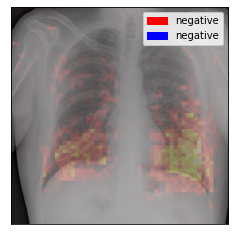

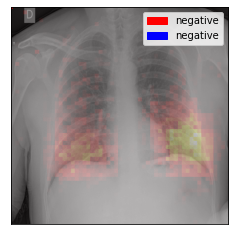

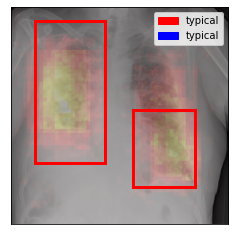

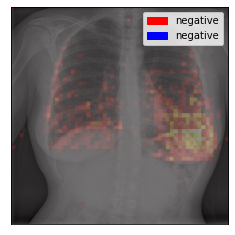

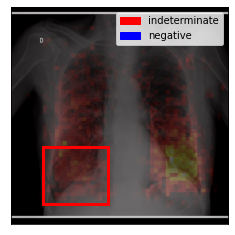

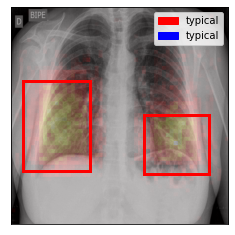

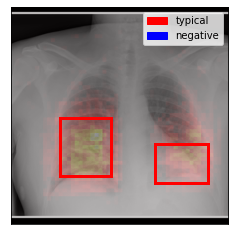

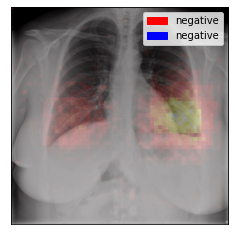

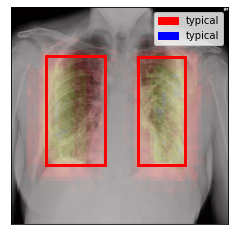

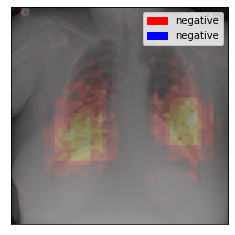

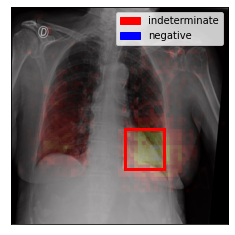

In [130]:
with torch.no_grad():
    model.eval()
    iterator = iter(test_dataloader) 
    image, truth, heat, index = next(iterator)
    print(index)
    image = image.to(dev)
    heat_pred, label_pred = model(image)
    #print(heat_pred)
    label_pred, heat_pred, image = label_pred.cpu(), heat_pred.cpu(), image.cpu()
    label_prob = softmax(label_pred, dim=1)
    class_pred = torch.argmax(label_prob, dim=1)
    box_truth = getBoxFromHeatMap(heat)
    plot_lung(image, heat_pred, box_truth, class_pred, truth)

In [131]:
torch.cuda.empty_cache()